In [ ]:
pip install datasets 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 33.7 MB/s 
     |████████████████████████████████| 182 kB 58.3 MB/s 
     |████████████████████████████████| 212 kB 53.7 MB/s 
     |████████████████████████████████| 132 kB 60.9 MB/s 
     |████████████████████████████████| 127 kB 76.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
pip install pyvi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 23.2 MB/s 
     |████████████████████████████████| 1.0 MB 73.4 MB/s 


In [ ]:
pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 489.6 MB 30 kB/s 
     |████████████████████████████████| 1.3 MB 53.3 MB/s 
     |████████████████████████████████| 463 kB 57.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


#Inport Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM, GRU, Input, GlobalMaxPooling1D, LayerNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from pyvi import ViUtils

#Load Dataset

In [ ]:
from datasets import load_dataset

dataset = load_dataset("uit-nlp/vietnamese_students_feedback")

dataset.set_format("pandas")
# df = dataset.to_pandas()
df1 = dataset["train"][:]

df2 = dataset["test"][:]
df3 = dataset["validation"][:]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset vietnamese_students_feedback downloaded and prepared to /root/.cache/huggingface/datasets/uit-nlp___vietnamese_students_feedback/default/1.0.0/b01aa0fea00f1179ef9c093babb5e91f44bc60f19ded600754a08e018503e40f. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:

df = pd.concat((df1, df2, df3))
df.columns = ['Sentence', 'Sentiment', 'Topic']

print(df)


                                               Sentence  Sentiment  Topic
0                             slide giáo trình đầy đủ .          2      1
1        nhiệt tình giảng dạy , gần gũi với sinh viên .          2      0
2                  đi học đầy đủ full điểm chuyên cần .          0      1
3     chưa áp dụng công nghệ thông tin và các thiết ...          0      0
4     thầy giảng bài hay , có nhiều bài tập ví dụ ng...          2      0
...                                                 ...        ...    ...
1578                              hướng dẫn lab mơ hồ .          0      0
1579  thầy cho chúng em những bài tập mang tính thực...          2      0
1580  thầy không dạy nhiều chủ yếu cho sinh viên tự ...          0      0
1581  em muốn đổi tên môn học vì tên môn là lập trìn...          0      1
1582  thầy vừa dạy vừa chat hoặc gọi điện thoại thườ...          0      0

[16175 rows x 3 columns]


#Create Input + Label From Raw Data

In [ ]:
df = df.drop(columns="Topic")

map_dict = {0: "Tiêu cực", 1: "Trung lập", 2: "Tích cực"}
df["Sentiment"] = df["Sentiment"].map(map_dict)
df.head()

,Sentence,Sentiment
0,slide giáo trình đầy đủ .,Tích cực
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",Tích cực
2,đi học đầy đủ full điểm chuyên cần .,Tiêu cực
3,chưa áp dụng công nghệ thông tin và các thiết ...,Tiêu cực
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",Tích cực


#Preprocessing Data & Prepare Data For Training

In [ ]:
input_data = df['Sentence'].values
input_label = df['Sentiment'].values

label_dict = {'Tiêu cực':0, 'Trung lập':1, 'Tích cực':2}

input_pre = []
label_with_accent = []
for idx, dt in enumerate(input_data):
  input_text_pre = list(tf.keras.preprocessing.text.text_to_word_sequence(dt))
  input_text_pre = " ".join(input_text_pre) 
  input_text_pre_no_accent = str(ViUtils.remove_accents(input_text_pre).decode("utf-8"))
  input_text_pre_accent = ViTokenizer.tokenize(input_text_pre)
  input_text_pre_no_accent = ViTokenizer.tokenize(input_text_pre_no_accent)
  input_pre.append(input_text_pre_accent)
  input_pre.append(input_text_pre_no_accent)
  label_with_accent.append(input_label[idx])
  label_with_accent.append(input_label[idx])
  

#Visualize The Average Length Of Sentence

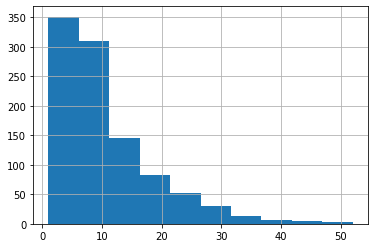

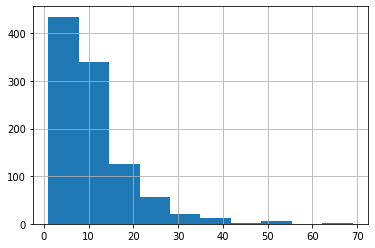

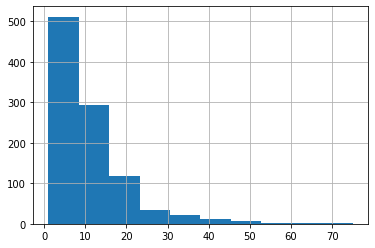

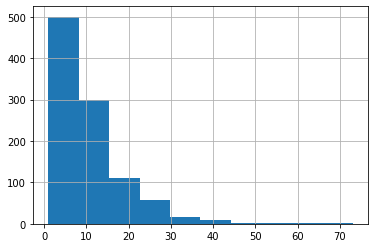

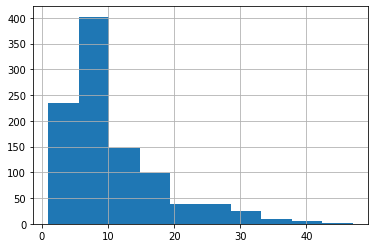

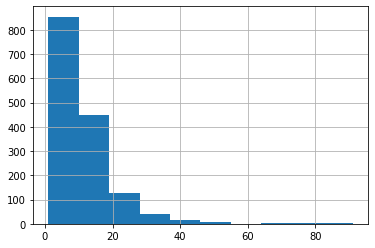

In [ ]:
seq_len = [len(i.split()) for i in input_pre[0:1000]]
pd.Series(seq_len).hist(bins =10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[1000:2000]]
pd.Series(seq_len).hist(bins = 10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[2000:3000]]
pd.Series(seq_len).hist(bins = 10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[3000:4000]]
pd.Series(seq_len).hist(bins = 10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[4000:5000]]
pd.Series(seq_len).hist(bins = 10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[5000:6500]]
pd.Series(seq_len).hist(bins = 10)
plt.show()

In [ ]:
label_idx = [label_dict[i] for i in label_with_accent]
label_tf = tf.keras.utils.to_categorical (label_idx, num_classes=3, dtype='float32')

tokenizer_data = Tokenizer (oov_token='<00V>', filters = '', split = ' ')
tokenizer_data.fit_on_texts (input_pre)

tokenized_data_text= tokenizer_data.texts_to_sequences (input_pre)
vec_data = pad_sequences (tokenized_data_text, padding='post', maxlen = 512)

pickle.dump(tokenizer_data, open("tokenizer_data.pkl", "wb" ))

print("input data.shape ", vec_data.shape)
data_vocab_size = len(tokenizer_data.word_index)+1
print("data_vocab_size: ", data_vocab_size)


X_train, X_val, y_train, y_val = train_test_split(vec_data, label_tf, test_size=0.2, random_state=122) #122
X_train, X_test, y_train, y_test= train_test_split (X_train, y_train, test_size=0.1, random_state=122)
print("training sample: ", len(X_train))
print("validation sample: ", len(X_val))
print("test sample: ", len(X_test))

input data.shape  (32350, 512)
data_vocab_size:  5852
training sample:  23292
validation sample:  6470
test sample:  2588


#Create Model From Scratch

In [ ]:
import keras.backend as K
def generate_model():
    dropout_threshold = 0.4
    input_dim = data_vocab_size
    output_dim = 32
    input_length = 512 
    initializer = tf.keras.initializers.GlorotNormal()

    input_layer = Input(shape=(input_length))
    feature = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length, embeddings_initializer="GlorotNormal")(input_layer)

    cnn_feature = Conv1D(filters = 32, kernel_size=3, padding='same', activation='relu')(feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold)(cnn_feature)
    cnn_feature = Conv1D(filters = 32, kernel_size=3, padding='same', activation='relu')(cnn_feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = LayerNormalization()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold)(cnn_feature)

    bi_lstm_feature = Bidirectional(LSTM(units = 32, dropout=dropout_threshold, return_sequences=True, kernel_initializer=initializer), merge_mode = 'concat')(feature)
    bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)

    bi_lstm_feature = Bidirectional(GRU(units = 32, dropout=dropout_threshold, return_sequences=True, kernel_initializer=initializer), merge_mode = 'concat')(bi_lstm_feature)
    bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)
    bi_lstm_feature = LayerNormalization()(bi_lstm_feature)

    combine_feature = tf.keras.layers.Concatenate()([cnn_feature, bi_lstm_feature])
    combine_feature = GlobalMaxPooling1D()(combine_feature)
    combine_feature = LayerNormalization()(combine_feature)

    classifier = Dense(90, activation = 'relu')(combine_feature)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(70, activation = 'relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(50, activation = 'relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(30, activation = 'relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(3, activation = 'softmax')(classifier)

    model = tf.keras.Model (inputs = input_layer, outputs = classifier)

    return model
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

model = generate_model()
adam = Adam(learning_rate = 0.001)#0.001
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy', f1_score, recall, precision])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 512, 32)      187264      ['input_3[0][0]']                
                                                                                                  
 conv1d_4 (Conv1D)              (None, 512, 32)      3104        ['embedding_2[0][0]']            
                                                                                                  
 max_pooling1d_8 (MaxPooling1D)  (None, 256, 32)     0           ['conv1d_4[0][0]']               
                                                                                            

#Visualize Model Architecture

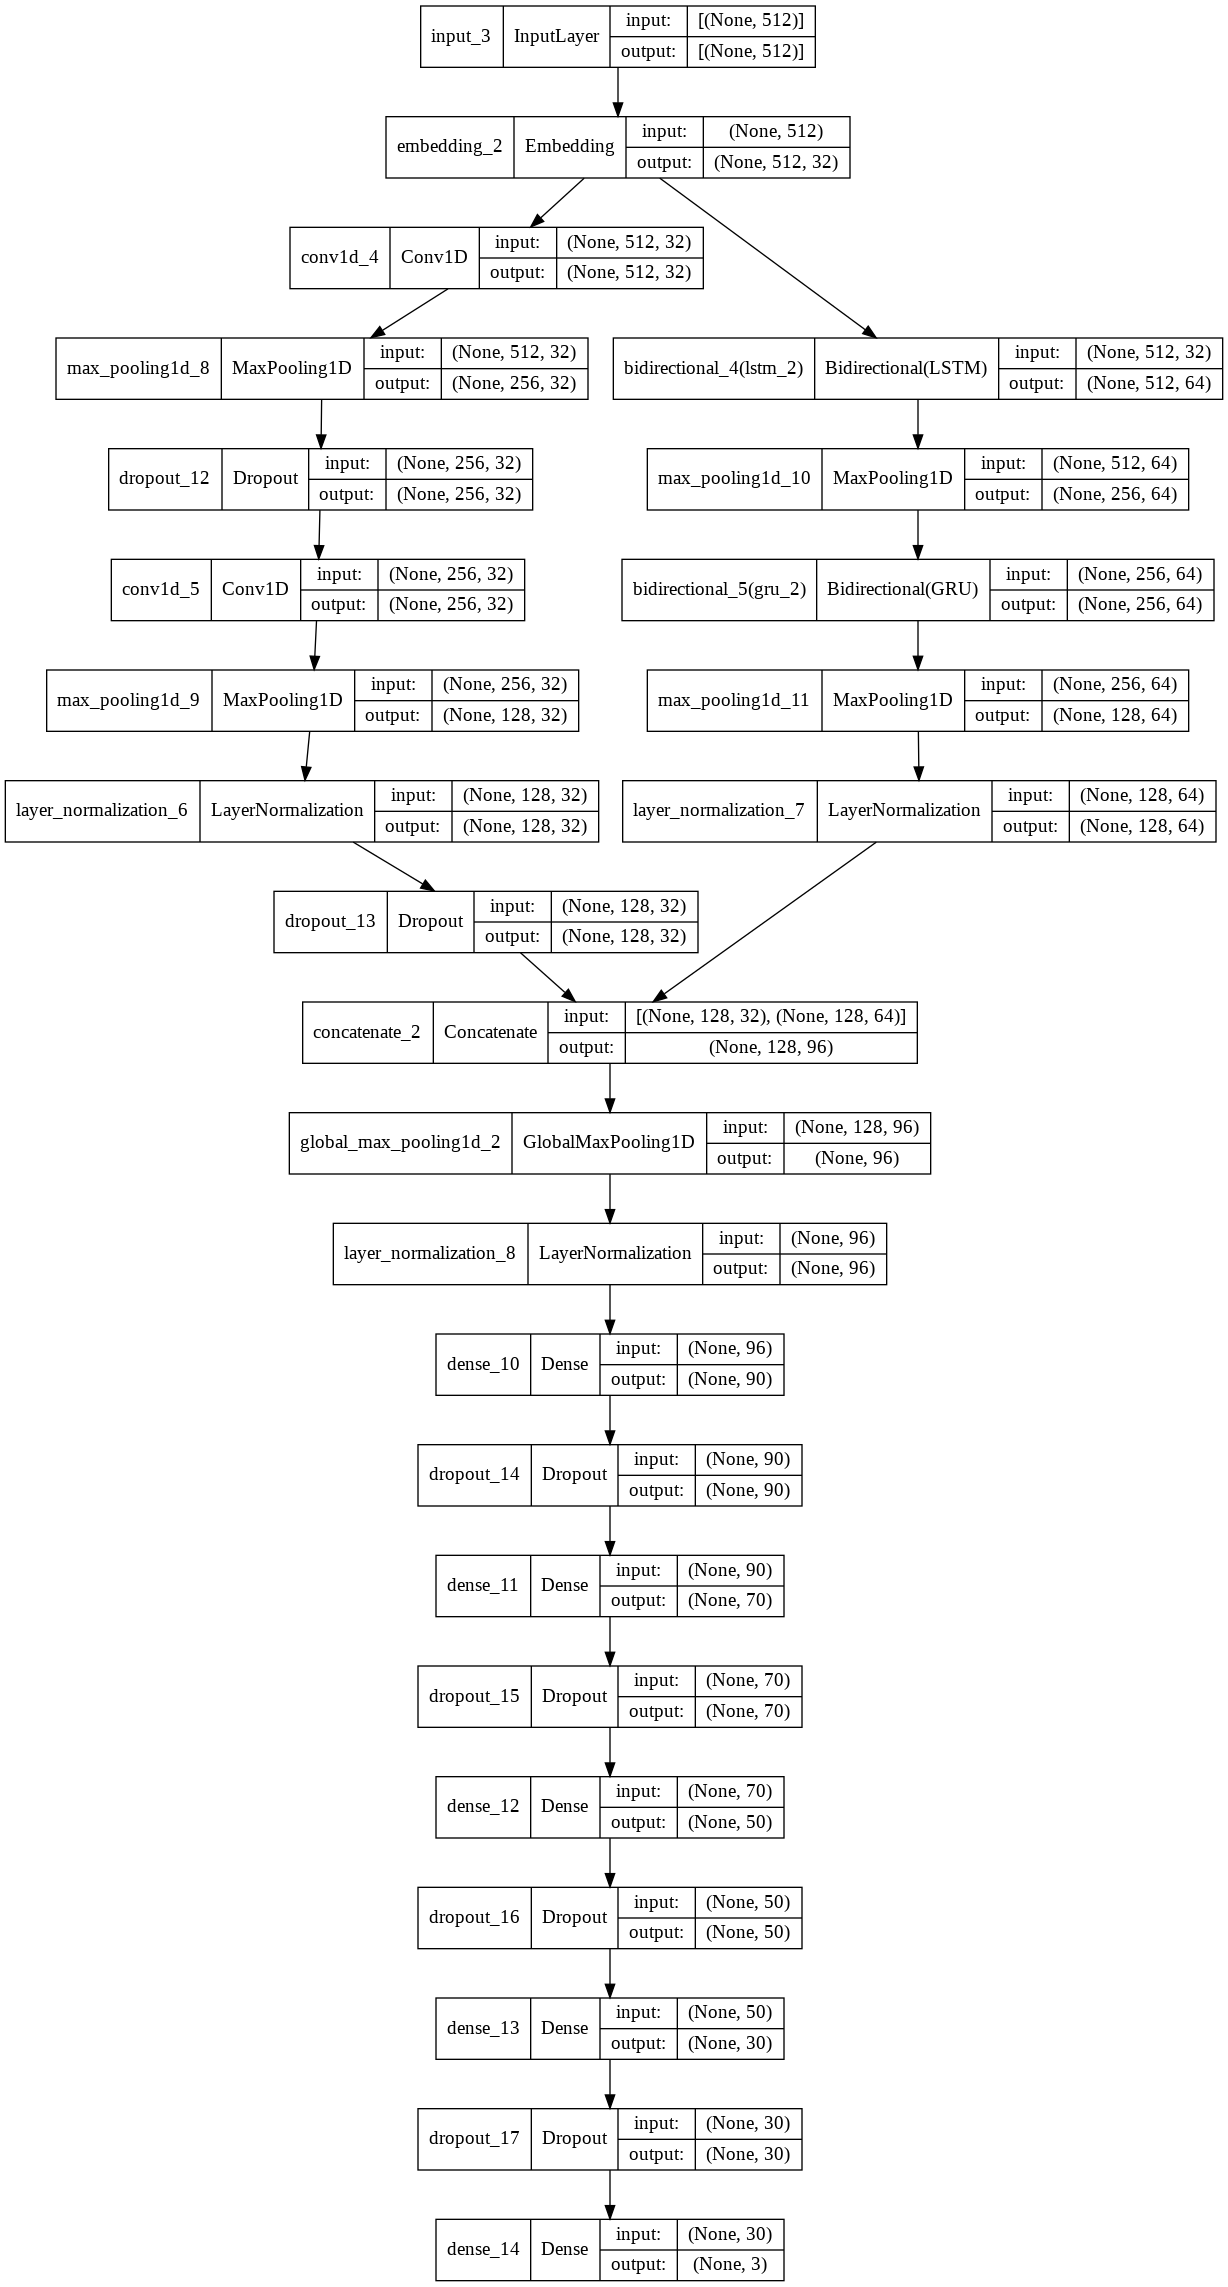

In [ ]:
dot_img_file =  'model visualize.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

#Define Model Checkpoint & Training

In [ ]:
from keras import callbacks
callback_model = tf.keras.callbacks.ModelCheckpoint ('model_cnn_bilstm.h5', monitor='val_loss')

history = model.fit(x = X_train, y = y_train, validation_data = (X_val, y_val), epochs = 20, batch_size = 1000, callbacks = [callback_model])

Epoch 1/20
24/24 [==============================] - 170s 7s/step - loss: 0.1162 - accuracy: 0.9642 - f1_score: 0.9646 - recall: 0.9590 - precision: 0.9702 - val_loss: 0.4078 - val_accuracy: 0.9093 - val_f1_score: 0.9089 - val_recall: 0.9045 - val_precision: 0.9133
Epoch 2/20
24/24 [==============================] - 151s 6s/step - loss: 0.1087 - accuracy: 0.9649 - f1_score: 0.9653 - recall: 0.9617 - precision: 0.9689 - val_loss: 0.3932 - val_accuracy: 0.9096 - val_f1_score: 0.9094 - val_recall: 0.9053 - val_precision: 0.9135
Epoch 3/20
24/24 [==============================] - 145s 6s/step - loss: 0.1048 - accuracy: 0.9678 - f1_score: 0.9683 - recall: 0.9639 - precision: 0.9726 - val_loss: 0.3943 - val_accuracy: 0.9099 - val_f1_score: 0.9079 - val_recall: 0.9027 - val_precision: 0.9132
Epoch 4/20
24/24 [==============================] - 146s 6s/step - loss: 0.1005 - accuracy: 0.9692 - f1_score: 0.9690 - recall: 0.9653 - precision: 0.9729 - val_loss: 0.4101 - val_accuracy: 0.9094 - val_f1

#Model Evaluation On Test Data

In [ ]:
model.load_weights("model_cnn_bilstm.h5")
model.evaluate(X_test,y_test)

81/81 [==============================] - 13s 159ms/step - loss: 0.4156 - accuracy: 0.9100 - f1_score: 0.9111 - recall: 0.9081 - precision: 0.9143


[0.41562092304229736,
 0.9099690914154053,
 0.911109447479248,
 0.908068835735321,
 0.9142822623252869]

#Inference Model With Input Test

In [ ]:
def preprocess_raw_input (raw_input, tokenizer):
  input_text_pre = list(tf.keras.preprocessing.text.text_to_word_sequence(raw_input))
  input_text_pre = " ".join(input_text_pre)
  input_text_pre_accent = ViTokenizer.tokenize(input_text_pre)
  print("Text preprocessed:", input_text_pre_accent)
  tokenized_data_text= tokenizer.texts_to_sequences ([input_text_pre_accent])
  vec_data = pad_sequences (tokenized_data_text, padding='post', maxlen = 512)
  return vec_data

def inference_model(input_feature, model):
  output = model (input_feature).numpy()[0]
  result = output.argmax()
  conf = float (output.max())
  label_dict = {'Tiêu cực':0, 'Trung lập':1, 'Tích cực':2}
  label= list (label_dict.keys ())
  return label [int (result)], conf

def prediction (raw_input, tokenizer, model):
  input_model= preprocess_raw_input (raw_input, tokenizer_data)
  result, conf = inference_model(input_model, model)
  return result, conf
my_model = generate_model()
my_model = load_model('model_cnn_bilstm.h5',custom_objects={'F1_score':f1_score,'Recall':recall,'precision': precision},compile=False)

with open (r"tokenizer_data.pkl", "rb") as input_file:
  my_tokenizer = pickle.load (input_file)
  
print(prediction("Giáo viên dạy dễ hiểu", my_tokenizer, my_model))

Text preprocessed: giáo_viên dạy dễ hiểu
('Tích cực', 0.9998729228973389)


In [ ]:
while(True):
  text = input()
  if text == "end":
    break
  else:
    print (prediction(text, my_tokenizer, my_model)[0]+"\n")

dễ bị áp lực
Text preprocessed: dễ bị áp_lực
Tiêu cực

thầy rất tận tình và đi dạy rất đúng giờ 
Text preprocessed: thầy rất tận_tình và đi dạy rất đúng giờ
Tích cực

tạo ra sự cạnh tranh trong mỗi buổi thực hành
Text preprocessed: tạo ra sự cạnh_tranh trong mỗi buổi thực_hành
Trung lập

cần nâng cấp hệ thống wifi , vì khi vào phòng thực hành , sinh viên không thể truy cập internet , buộc phải xin phép ra ngoài để làm bài
Text preprocessed: cần nâng_cấp hệ_thống wifi vì khi vào phòng thực_hành sinh_viên không_thể truy_cập internet buộc phải xin phép ra ngoài để làm bài
Tiêu cực

tận tâm , nhiệt tình , vui tính , dễ gần với sinh viên 
Text preprocessed: tận_tâm nhiệt_tình vui_tính dễ gần với sinh_viên
Tích cực

end
